# EDA about mushrooms -choose the most accurate model
### authors: Ester Moiseyev 318692464, Yarden Dali 207220013


import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from myProject import report
import joblib

## Preproccesing

In [2]:
data=pd.read_csv("mushrooms.csv")
cls_col = "class"

In [3]:
#lets see our data
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
#from a look in our csv file we know that there ara cells with '?'. 
#we will turn them into NaN values and check if now we have empty cells in our data
data = data.replace("?", np.NaN)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

We can see thet the column stalk-root has missing values
We will fill the cells with no value according the mean, and the common of every column in the dataframe


In [6]:
r = data.shape[0]  # number of rows
for col in data.columns:
    if col is cls_col:
        continue
    if data[col].dtype == np.int64 or data[col].dtype == np.int32 or data[col].dtype == np.float64:
        x = data[col].mean()
        data[col].fillna(x)
    else:
        x = str(data[col].mode())
        data[col] = data[col].fillna(x)



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Now we can see that there are no missing values in our data

In order to make it easy working with the data we will encode its values and turn it into nominal values


In [8]:
encoded_data = data.copy()
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == object:
        encoded_data[col]=le.fit_transform(data[col])
            

In [9]:
encoded_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


After we saw our data as nominal we will show the corrolation between our columns

<AxesSubplot:>

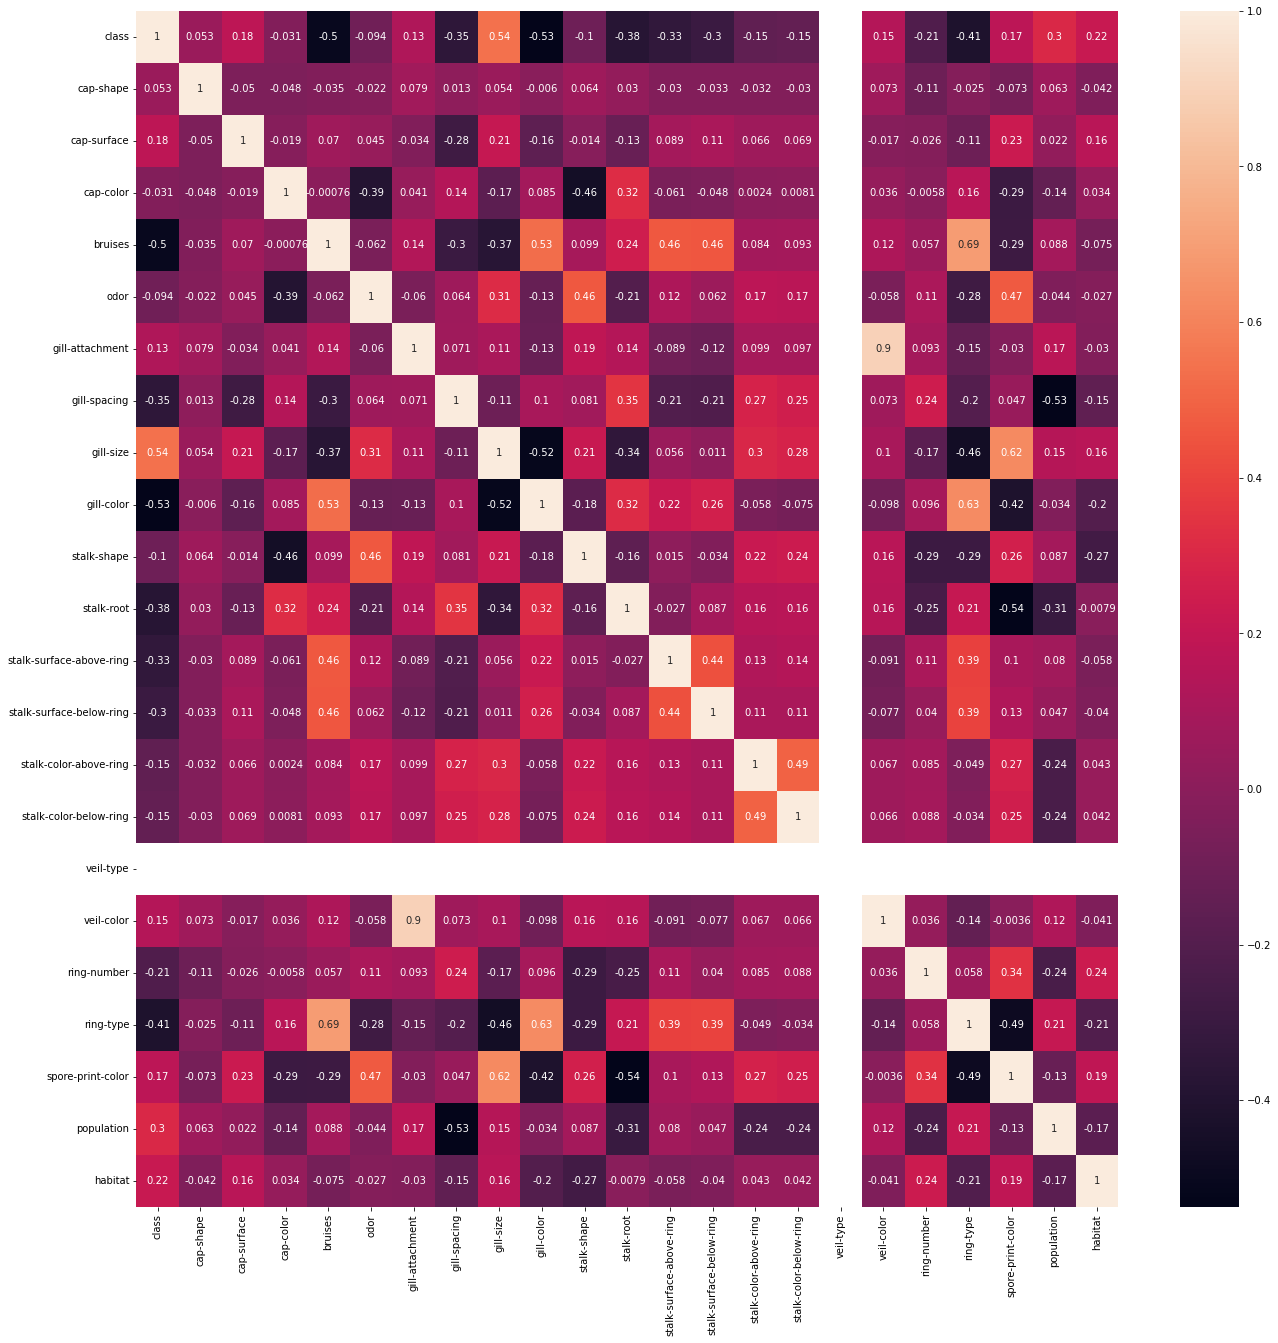

In [10]:

fig, ax = plt.subplots(figsize=(22,22))
sns.heatmap(encoded_data.corr(), annot=True, ax=ax)

We can see from the corrolation table that there are a few columns that have positive corrolation and a few with a negative corrolation. Also we can see that the "veil-type" column has only one value in all of the columns. 

In [11]:
##MinMax Scaling-normalization
y=list(encoded_data.columns)
x=encoded_data.values
min_max_scaler = MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
norm_data=pd.DataFrame(x_scaled)
norm_data.columns=y
print('normalized_data:\n{}'.format(x_scaled[:10,:10]))


normalized_data:
[[1.         1.         0.66666667 0.44444444 1.         0.75
  1.         0.         1.         0.36363636]
 [0.         1.         0.66666667 1.         1.         0.
  1.         0.         0.         0.36363636]
 [0.         0.         0.66666667 0.88888889 1.         0.375
  1.         0.         0.         0.45454545]
 [1.         1.         1.         0.88888889 1.         0.75
  1.         0.         1.         0.45454545]
 [0.         1.         0.66666667 0.33333333 0.         0.625
  1.         1.         0.         0.36363636]
 [0.         1.         1.         1.         1.         0.
  1.         0.         0.         0.45454545]
 [0.         0.         0.66666667 0.88888889 1.         0.
  1.         0.         0.         0.18181818]
 [0.         0.         1.         0.88888889 1.         0.375
  1.         0.         0.         0.45454545]
 [1.         1.         1.         0.88888889 1.         0.75
  1.         0.         1.         0.63636364]
 [0. 

After we normalized the data we will split it into a train test, we decided to devide it this way so that we will have 3 experiments to run

In [12]:

X = encoded_data.copy()
y = X.pop(cls_col)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=100, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=100, test_size=0.3)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, random_state=100, test_size=0.4)
X_train_lst = [X_train1,X_train2,X_train3]
X_test_lst = [X_test1,X_test2,X_test3]
y_train_lst = [y_train1,y_train2,y_train3]
y_test_lst = [y_test1,y_test2,y_test3]



Next we will find the hyperparameter "n-neighbors" for our knn model for each of the experiments. Also we will show its visualization



For test number 1


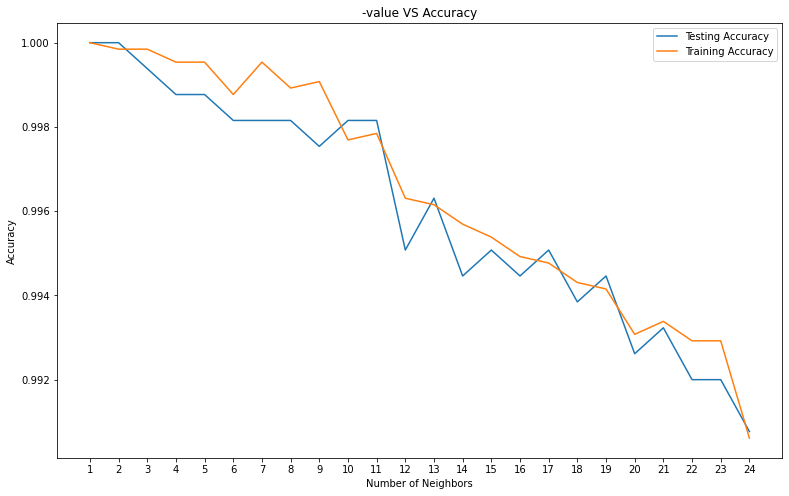

Best accuracy is 1.0 with K = 1


For test number 2


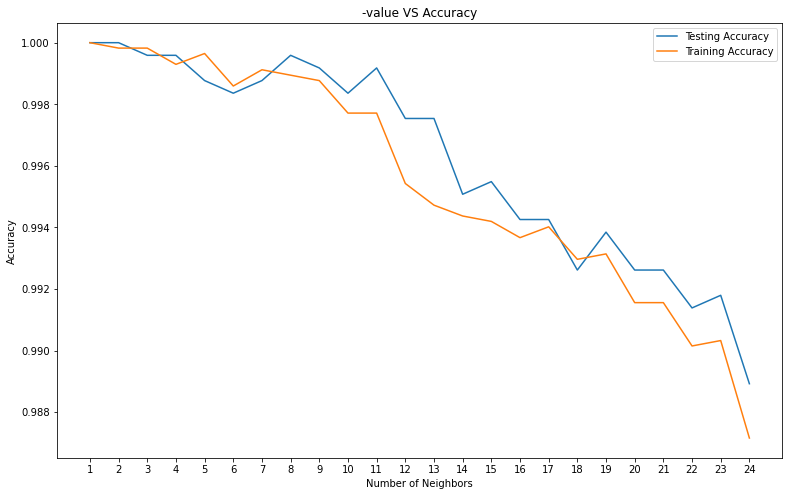

Best accuracy is 1.0 with K = 1


For test number 3


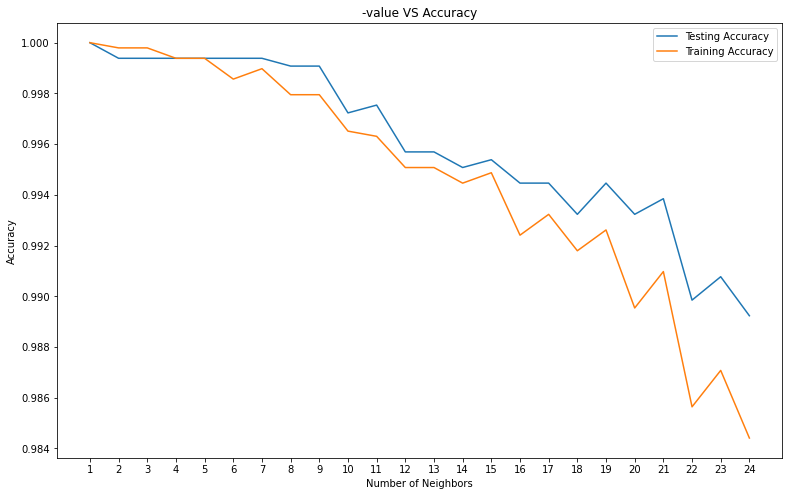

Best accuracy is 1.0 with K = 1


In [13]:
for j  in range(3):
    neig = np.arange(1, 25)
    train_accuracy = []
    test_accuracy = []
    # Loop over different values of k
    for i, k in enumerate(neig):
        # k from 1 to 25(exclude)
        knn = KNeighborsClassifier(n_neighbors=k)
        # Fit with knn
        knn.fit(X_train_lst[j],y_train_lst[j])
        #train accuracy
        train_accuracy.append(knn.score(X_train_lst[j], y_train_lst[j]))
        # test accuracy
        test_accuracy.append(knn.score(X_test_lst[j], y_test_lst[j]))

    # Plot
    plt.figure(figsize=[13,8])
    plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
    plt.plot(neig, train_accuracy, label = 'Training Accuracy')
    plt.legend()
    plt.title('-value VS Accuracy')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.xticks(neig)
    plt.savefig('graph.png')
    print("\n\nFor test number {}".format(j+1))
    plt.show()
    print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


In order to find the hyperparameter "cluster" for our knn model we will install the "yellowbrick" library

In [13]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


Next we will find the hyperparameter and show its visualization

Elbow Method:


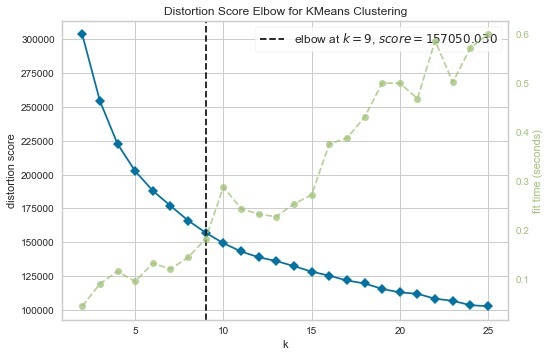

In [14]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method:')
Elbow_M = KElbowVisualizer(KMeans(), k=25)
Elbow_M.fit(encoded_data)
Elbow_M.show();

 - Equal Depth discretization 

In [15]:
print("divide the data into 2 bins:")
bin_data = encoded_data.copy()
for col in encoded_data.columns:
    bin_data[col] = pd.qcut(bin_data[col], q=2,duplicates="drop")
bin_data

divide the data into 2 bins:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,"(-0.001, 1.0]","(3.0, 5.0]","(-0.001, 2.0]","(-0.001, 4.0]","(-0.001, 1.0]","(5.0, 8.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",...,"(-0.001, 2.0]","(-0.001, 7.0]","(-0.001, 7.0]",NaN,"(-0.001, 2.0]","(-0.001, 1.0]","(2.0, 4.0]","(-0.001, 3.0]","(-0.001, 4.0]","(1.0, 6.0]"
1,"(-0.001, 1.0]","(3.0, 5.0]","(-0.001, 2.0]","(4.0, 9.0]","(-0.001, 1.0]","(-0.001, 5.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",...,"(-0.001, 2.0]","(-0.001, 7.0]","(-0.001, 7.0]",NaN,"(-0.001, 2.0]","(-0.001, 1.0]","(2.0, 4.0]","(-0.001, 3.0]","(-0.001, 4.0]","(-0.001, 1.0]"
2,"(-0.001, 1.0]","(-0.001, 3.0]","(-0.001, 2.0]","(4.0, 9.0]","(-0.001, 1.0]","(-0.001, 5.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",...,"(-0.001, 2.0]","(-0.001, 7.0]","(-0.001, 7.0]",NaN,"(-0.001, 2.0]","(-0.001, 1.0]","(2.0, 4.0]","(-0.001, 3.0]","(-0.001, 4.0]","(1.0, 6.0]"
3,"(-0.001, 1.0]","(3.0, 5.0]","(2.0, 3.0]","(4.0, 9.0]","(-0.001, 1.0]","(5.0, 8.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",...,"(-0.001, 2.0]","(-0.001, 7.0]","(-0.001, 7.0]",NaN,"(-0.001, 2.0]","(-0.001, 1.0]","(2.0, 4.0]","(-0.001, 3.0]","(-0.001, 4.0]","(1.0, 6.0]"
4,"(-0.001, 1.0]","(3.0, 5.0]","(-0.001, 2.0]","(-0.001, 4.0]","(-0.001, 1.0]","(-0.001, 5.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",...,"(-0.001, 2.0]","(-0.001, 7.0]","(-0.001, 7.0]",NaN,"(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 3.0]","(-0.001, 4.0]","(-0.001, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,"(-0.001, 1.0]","(-0.001, 3.0]","(-0.001, 2.0]","(-0.001, 4.0]","(-0.001, 1.0]","(-0.001, 5.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(5.0, 11.0]",...,"(-0.001, 2.0]","(-0.001, 7.0]","(-0.001, 7.0]",NaN,"(-0.001, 2.0]","(-0.001, 1.0]","(2.0, 4.0]","(-0.001, 3.0]","(-0.001, 4.0]","(1.0, 6.0]"
8120,"(-0.001, 1.0]","(3.0, 5.0]","(-0.001, 2.0]","(-0.001, 4.0]","(-0.001, 1.0]","(-0.001, 5.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(5.0, 11.0]",...,"(-0.001, 2.0]","(-0.001, 7.0]","(-0.001, 7.0]",NaN,"(-0.001, 2.0]","(-0.001, 1.0]","(2.0, 4.0]","(-0.001, 3.0]","(-0.001, 4.0]","(1.0, 6.0]"
8121,"(-0.001, 1.0]","(-0.001, 3.0]","(-0.001, 2.0]","(-0.001, 4.0]","(-0.001, 1.0]","(-0.001, 5.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",...,"(-0.001, 2.0]","(-0.001, 7.0]","(-0.001, 7.0]",NaN,"(-0.001, 2.0]","(-0.001, 1.0]","(2.0, 4.0]","(-0.001, 3.0]","(-0.001, 4.0]","(1.0, 6.0]"
8122,"(-0.001, 1.0]","(-0.001, 3.0]","(2.0, 3.0]","(-0.001, 4.0]","(-0.001, 1.0]","(5.0, 8.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",...,"(-0.001, 2.0]","(-0.001, 7.0]","(-0.001, 7.0]",NaN,"(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(3.0, 8.0]","(-0.001, 4.0]","(1.0, 6.0]"


now after we cleaned our data,and ran the normalization and the discretization on it
we will activate the models on our data

In [70]:
model_dict = {}
#This function helps us with the prediction of each model for every kind of experiment
#After we make the prediction we rant he report function from our program(from the file "myProject")
def load(s, X_train, y_train, X_test, y_test):
    global model_dict
    loaded_model.fit(X_train,y_train)
    result = loaded_model.score(X_test, y_test)
    if s =="knn":
        model_dict["Knn model"] = result
    elif s == "NB":
        model_dict["Naive bayes model"] = result
    else:
        model_dict["Decision tree model"] = result

    print("Model accuracy:{}%\n".format(result*100))
    y_pred1 = loaded_model.predict(X_test)
    y_pred2 = loaded_model.predict(X_train)
    report(y_test, y_pred1)
    print("\n\n\n")
    report(y_train,y_pred2)
    

### First experiment: train = 80%, test = 20%

In [98]:
accuracy_lst1 = []

In [99]:
loaded_model = joblib.load('finalized_model_dt.sav')
load("dt", X_train_lst[0], y_train_lst[0],X_test_lst[0],y_test_lst[0] )
accuracy_lst1.append(loaded_model.score(X_test_lst[0], y_test_lst[0]))

Model accuracy:95.63076923076923%

Confusion Matrix: 
 [[778  48]
 [ 23 776]]
Accuracy :  95.63076923076923
Classification report:               precision    recall  f1-score   support

           0       0.97      0.94      0.96       826
           1       0.94      0.97      0.96       799

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625





Confusion Matrix: 
 [[3202  180]
 [  85 3032]]
Accuracy :  95.92244960763195
Classification report:               precision    recall  f1-score   support

           0       0.97      0.95      0.96      3382
           1       0.94      0.97      0.96      3117

    accuracy                           0.96      6499
   macro avg       0.96      0.96      0.96      6499
weighted avg       0.96      0.96      0.96      6499



In [100]:
loaded_model = joblib.load('finalized_model_nb2.sav')
load("NB", X_train_lst[0], y_train_lst[0],X_test_lst[0],y_test_lst[0] )
accuracy_lst1.append(loaded_model.score(X_test_lst[0], y_test_lst[0]))

Model accuracy:92.67692307692307%

Confusion Matrix: 
 [[764  62]
 [ 57 742]]
Accuracy :  92.67692307692307
Classification report:               precision    recall  f1-score   support

           0       0.93      0.92      0.93       826
           1       0.92      0.93      0.93       799

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625





Confusion Matrix: 
 [[3109  273]
 [ 248 2869]]
Accuracy :  91.98338205877828
Classification report:               precision    recall  f1-score   support

           0       0.93      0.92      0.92      3382
           1       0.91      0.92      0.92      3117

    accuracy                           0.92      6499
   macro avg       0.92      0.92      0.92      6499
weighted avg       0.92      0.92      0.92      6499



In [101]:
loaded_model = joblib.load('finalized_model_knn.sav')
load("knn", X_train_lst[0], y_train_lst[0],X_test_lst[0],y_test_lst[0] )
accuracy_lst1.append(loaded_model.score(X_test_lst[0], y_test_lst[0]))

Model accuracy:100.0%

Confusion Matrix: 
 [[826   0]
 [  0 799]]
Accuracy :  100.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625





Confusion Matrix: 
 [[3382    0]
 [   0 3117]]
Accuracy :  100.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3382
           1       1.00      1.00      1.00      3117

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



### Finding the most accurate model for experiment 1

In [102]:
max_value = max(model_dict.values())
for k in model_dict.keys():
    if model_dict[k] == max_value:
        max_key = k
print("The most accurate model is {} and his accuracy is {}%".format(max_key,max_value*100))



The most accurate model is Knn model and his accuracy is 100.0%


we ran the model on the 80% train and 20% test and we can see that for this split the most accurate model is Knn classifier model

### second experiment: train = 60%, test = 40%

In [106]:
accuracy_lst2 = []
loaded_model = joblib.load('finalized_model_dt_60_40.sav')
load("dt", X_train_lst[2], y_train_lst[2],X_test_lst[2],y_test_lst[2] )
accuracy_lst2.append(loaded_model.score(X_test_lst[2], y_test_lst[2]))

Model accuracy:95.93846153846154%

Confusion Matrix: 
 [[1609   84]
 [  48 1509]]
Accuracy :  95.93846153846154
Classification report:               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1693
           1       0.95      0.97      0.96      1557

    accuracy                           0.96      3250
   macro avg       0.96      0.96      0.96      3250
weighted avg       0.96      0.96      0.96      3250





Confusion Matrix: 
 [[2371  144]
 [  60 2299]]
Accuracy :  95.814526056627
Classification report:               precision    recall  f1-score   support

           0       0.98      0.94      0.96      2515
           1       0.94      0.97      0.96      2359

    accuracy                           0.96      4874
   macro avg       0.96      0.96      0.96      4874
weighted avg       0.96      0.96      0.96      4874



In [107]:
loaded_model = joblib.load('finalized_model_nb2_40_60.sav')
load("NB", X_train_lst[2], y_train_lst[2],X_test_lst[2],y_test_lst[2] )
accuracy_lst2.append(loaded_model.score(X_test_lst[2], y_test_lst[2]))

Model accuracy:92.24615384615385%

Confusion Matrix: 
 [[1554  139]
 [ 113 1444]]
Accuracy :  92.24615384615385
Classification report:               precision    recall  f1-score   support

           0       0.93      0.92      0.93      1693
           1       0.91      0.93      0.92      1557

    accuracy                           0.92      3250
   macro avg       0.92      0.92      0.92      3250
weighted avg       0.92      0.92      0.92      3250





Confusion Matrix: 
 [[2302  213]
 [ 191 2168]]
Accuracy :  91.71112022979072
Classification report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92      2515
           1       0.91      0.92      0.91      2359

    accuracy                           0.92      4874
   macro avg       0.92      0.92      0.92      4874
weighted avg       0.92      0.92      0.92      4874



In [108]:
loaded_model = joblib.load('finalized_model_knn-60-40.sav')
load("knn", X_train_lst[2], y_train_lst[2],X_test_lst[2],y_test_lst[2] )
accuracy_lst2.append(loaded_model.score(X_test_lst[2], y_test_lst[2]))

Model accuracy:100.0%

Confusion Matrix: 
 [[1693    0]
 [   0 1557]]
Accuracy :  100.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1693
           1       1.00      1.00      1.00      1557

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250





Confusion Matrix: 
 [[2515    0]
 [   0 2359]]
Accuracy :  100.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2515
           1       1.00      1.00      1.00      2359

    accuracy                           1.00      4874
   macro avg       1.00      1.00      1.00      4874
weighted avg       1.00      1.00      1.00      4874



### Finding the most accurate model for experiment 2

In [109]:
max_value = max(model_dict.values())
for k in model_dict.keys():
    if model_dict[k] == max_value:
        max_key = k
print("The most accurate model is {} and his accuracy is {}%".format(max_key,max_value*100))


The most accurate model is Knn model and his accuracy is 100.0%


### third experiment: train = 70%, test = 30%

In [111]:
accuracy_lst3 = []
loaded_model = joblib.load('finalized_model_dt_70_30.sav')
load("dt", X_train_lst[1], y_train_lst[1],X_test_lst[1],y_test_lst[1] )
accuracy_lst3.append(loaded_model.score(X_test_lst[1], y_test_lst[1]))

Model accuracy:95.980311730927%

Confusion Matrix: 
 [[1193   65]
 [  33 1147]]
Accuracy :  95.980311730927
Classification report:               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1258
           1       0.95      0.97      0.96      1180

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438





Confusion Matrix: 
 [[2787  163]
 [  75 2661]]
Accuracy :  95.81428068941258
Classification report:               precision    recall  f1-score   support

           0       0.97      0.94      0.96      2950
           1       0.94      0.97      0.96      2736

    accuracy                           0.96      5686
   macro avg       0.96      0.96      0.96      5686
weighted avg       0.96      0.96      0.96      5686



In [112]:
loaded_model = joblib.load('finalized_model_nb2_70_30.sav')
load("NB", X_train_lst[1], y_train_lst[1],X_test_lst[1],y_test_lst[1] )
accuracy_lst3.append(loaded_model.score(X_test_lst[1], y_test_lst[1]))

Model accuracy:92.20672682526661%

Confusion Matrix: 
 [[1152  106]
 [  84 1096]]
Accuracy :  92.20672682526661
Classification report:               precision    recall  f1-score   support

           0       0.93      0.92      0.92      1258
           1       0.91      0.93      0.92      1180

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438





Confusion Matrix: 
 [[2708  242]
 [ 221 2515]]
Accuracy :  91.85719310587407
Classification report:               precision    recall  f1-score   support

           0       0.92      0.92      0.92      2950
           1       0.91      0.92      0.92      2736

    accuracy                           0.92      5686
   macro avg       0.92      0.92      0.92      5686
weighted avg       0.92      0.92      0.92      5686



In [113]:
loaded_model = joblib.load('finalized_model_knn-70-30.sav')
load("knn", X_train_lst[1], y_train_lst[1],X_test_lst[1],y_test_lst[1] )
accuracy_lst3.append(loaded_model.score(X_test_lst[1], y_test_lst[1]))

Model accuracy:100.0%

Confusion Matrix: 
 [[1258    0]
 [   0 1180]]
Accuracy :  100.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438





Confusion Matrix: 
 [[2950    0]
 [   0 2736]]
Accuracy :  100.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2950
           1       1.00      1.00      1.00      2736

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686



### Finding the most accurate model for experiment 3

In [114]:
max_value = max(model_dict.values())
for k in model_dict.keys():
    if model_dict[k] == max_value:
        max_key = k
print("The most accurate model is {} and his accuracy is {}%".format(max_key,max_value*100))


The most accurate model is Knn model and his accuracy is 100.0%


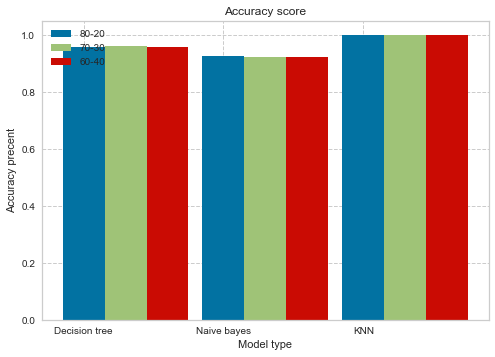

In [127]:
plt.title("Accuracy score")
plt.xlabel("Model type")
plt.ylabel("Accuracy precent")
m= ["Decision tree", "Naive bayes", "KNN"]
plt.xticks(np.arange(len(m)),m)
width=0.3
plt.bar(np.arange(len(accuracy_lst1)), accuracy_lst1, width=width,label = '80-20')
plt.bar(np.arange(len(accuracy_lst3))+ width, accuracy_lst3, width=width, label = '70-30')
plt.bar(np.arange(len(accuracy_lst2))+ width*2, accuracy_lst2, width=width, label = '60-40')

plt.legend(loc= "upper left")
plt.grid(linestyle="--")
plt.show()



we can see from this graph that the knn is the most accurate in all the experimets we ran on the data.

Visualization of the unique values in the classification column

<AxesSubplot:ylabel='class'>

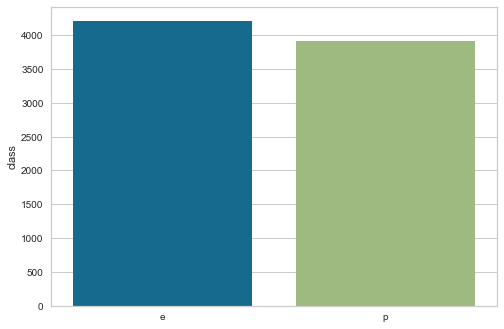

In [54]:
cls_vc = data[cls_col].value_counts()

sns.barplot(x = cls_vc.index, y = cls_vc)

Based on the graph and the majority rule we can assume that most of the mushrooms are edible